# Import Libraries

### Pandas
### Numpy
### Matplotlib
### Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV File 

In [2]:
df = pd.read_csv("gdp_growth_dataset.csv")

### Check the Data

In [3]:
df.head()

,Country,Year,Inflation (%),Unemployment (%),FDI ($B),Trade_Balance ($B),Gov_Spending ($B),GDP_Growth (%)
0,Lao People's Democratic Republic,2016,1.1,9.5,51.7,-141.7,1122.9,2.3
1,Comoros,2013,0.5,6.1,55.0,-126.6,536.7,2.7
2,Yemen,2022,0.1,8.4,68.8,39.5,716.0,4.5
3,British Indian Ocean Territory (Chagos Archipe...,2020,3.1,8.2,27.3,-127.5,651.4,1.2
4,Brazil,2017,2.2,7.6,127.6,-13.5,226.6,4.2


### Check Total number of rows and columns 

In [4]:
df.shape

(10000, 8)

### Check Null Values 

In [5]:
df.isnull().sum()

Country               0
Year                  0
Inflation (%)         0
Unemployment (%)      0
FDI ($B)              0
Trade_Balance ($B)    0
Gov_Spending ($B)     0
GDP_Growth (%)        0
dtype: int64

### Check Information about the dataset 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             10000 non-null  object 
 1   Year                10000 non-null  int64  
 2   Inflation (%)       10000 non-null  float64
 3   Unemployment (%)    10000 non-null  float64
 4   FDI ($B)            10000 non-null  float64
 5   Trade_Balance ($B)  10000 non-null  float64
 6   Gov_Spending ($B)   10000 non-null  float64
 7   GDP_Growth (%)      10000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 625.1+ KB


### Import LabelEncoder from sklearn for convert the categorical data into numerical

In [7]:
from sklearn.preprocessing import LabelEncoder

### Apply the LabelEncoder 

In [8]:
le = LabelEncoder()
df["Country"] = le.fit_transform(df["Country"])

### Check it data convert into numerical or not (successfully Converted into numerical)

In [9]:
df.head()

,Country,Year,Inflation (%),Unemployment (%),FDI ($B),Trade_Balance ($B),Gov_Spending ($B),GDP_Growth (%)
0,117,2016,1.1,9.5,51.7,-141.7,1122.9,2.3
1,48,2013,0.5,6.1,55.0,-126.6,536.7,2.7
2,240,2022,0.1,8.4,68.8,39.5,716.0,4.5
3,30,2020,3.1,8.2,27.3,-127.5,651.4,1.2
4,29,2017,2.2,7.6,127.6,-13.5,226.6,4.2


### Check Stastistical Summary of the data

In [10]:
df.describe()

,Country,Year,Inflation (%),Unemployment (%),FDI ($B),Trade_Balance ($B),Gov_Spending ($B),GDP_Growth (%)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,120.947800,2016.494300,2.496260,6.009410,50.95210,0.733890,512.165280,2.976390
std,69.589574,4.031823,1.506596,2.990928,28.13007,99.363038,277.824617,1.380451
min,0.000000,2010.000000,-3.400000,-5.600000,0.00000,-429.500000,0.000000,-2.300000
25%,61.000000,2013.000000,1.500000,4.000000,29.47500,-67.400000,302.000000,2.000000
50%,121.000000,2016.000000,2.500000,6.000000,49.80000,1.300000,500.500000,3.000000
75%,181.000000,2020.000000,3.500000,8.025000,70.40000,68.500000,700.200000,3.900000
max,242.000000,2023.000000,7.800000,19.400000,161.80000,353.700000,1623.600000,8.400000


### Check the relationship between the columns through pairplot 

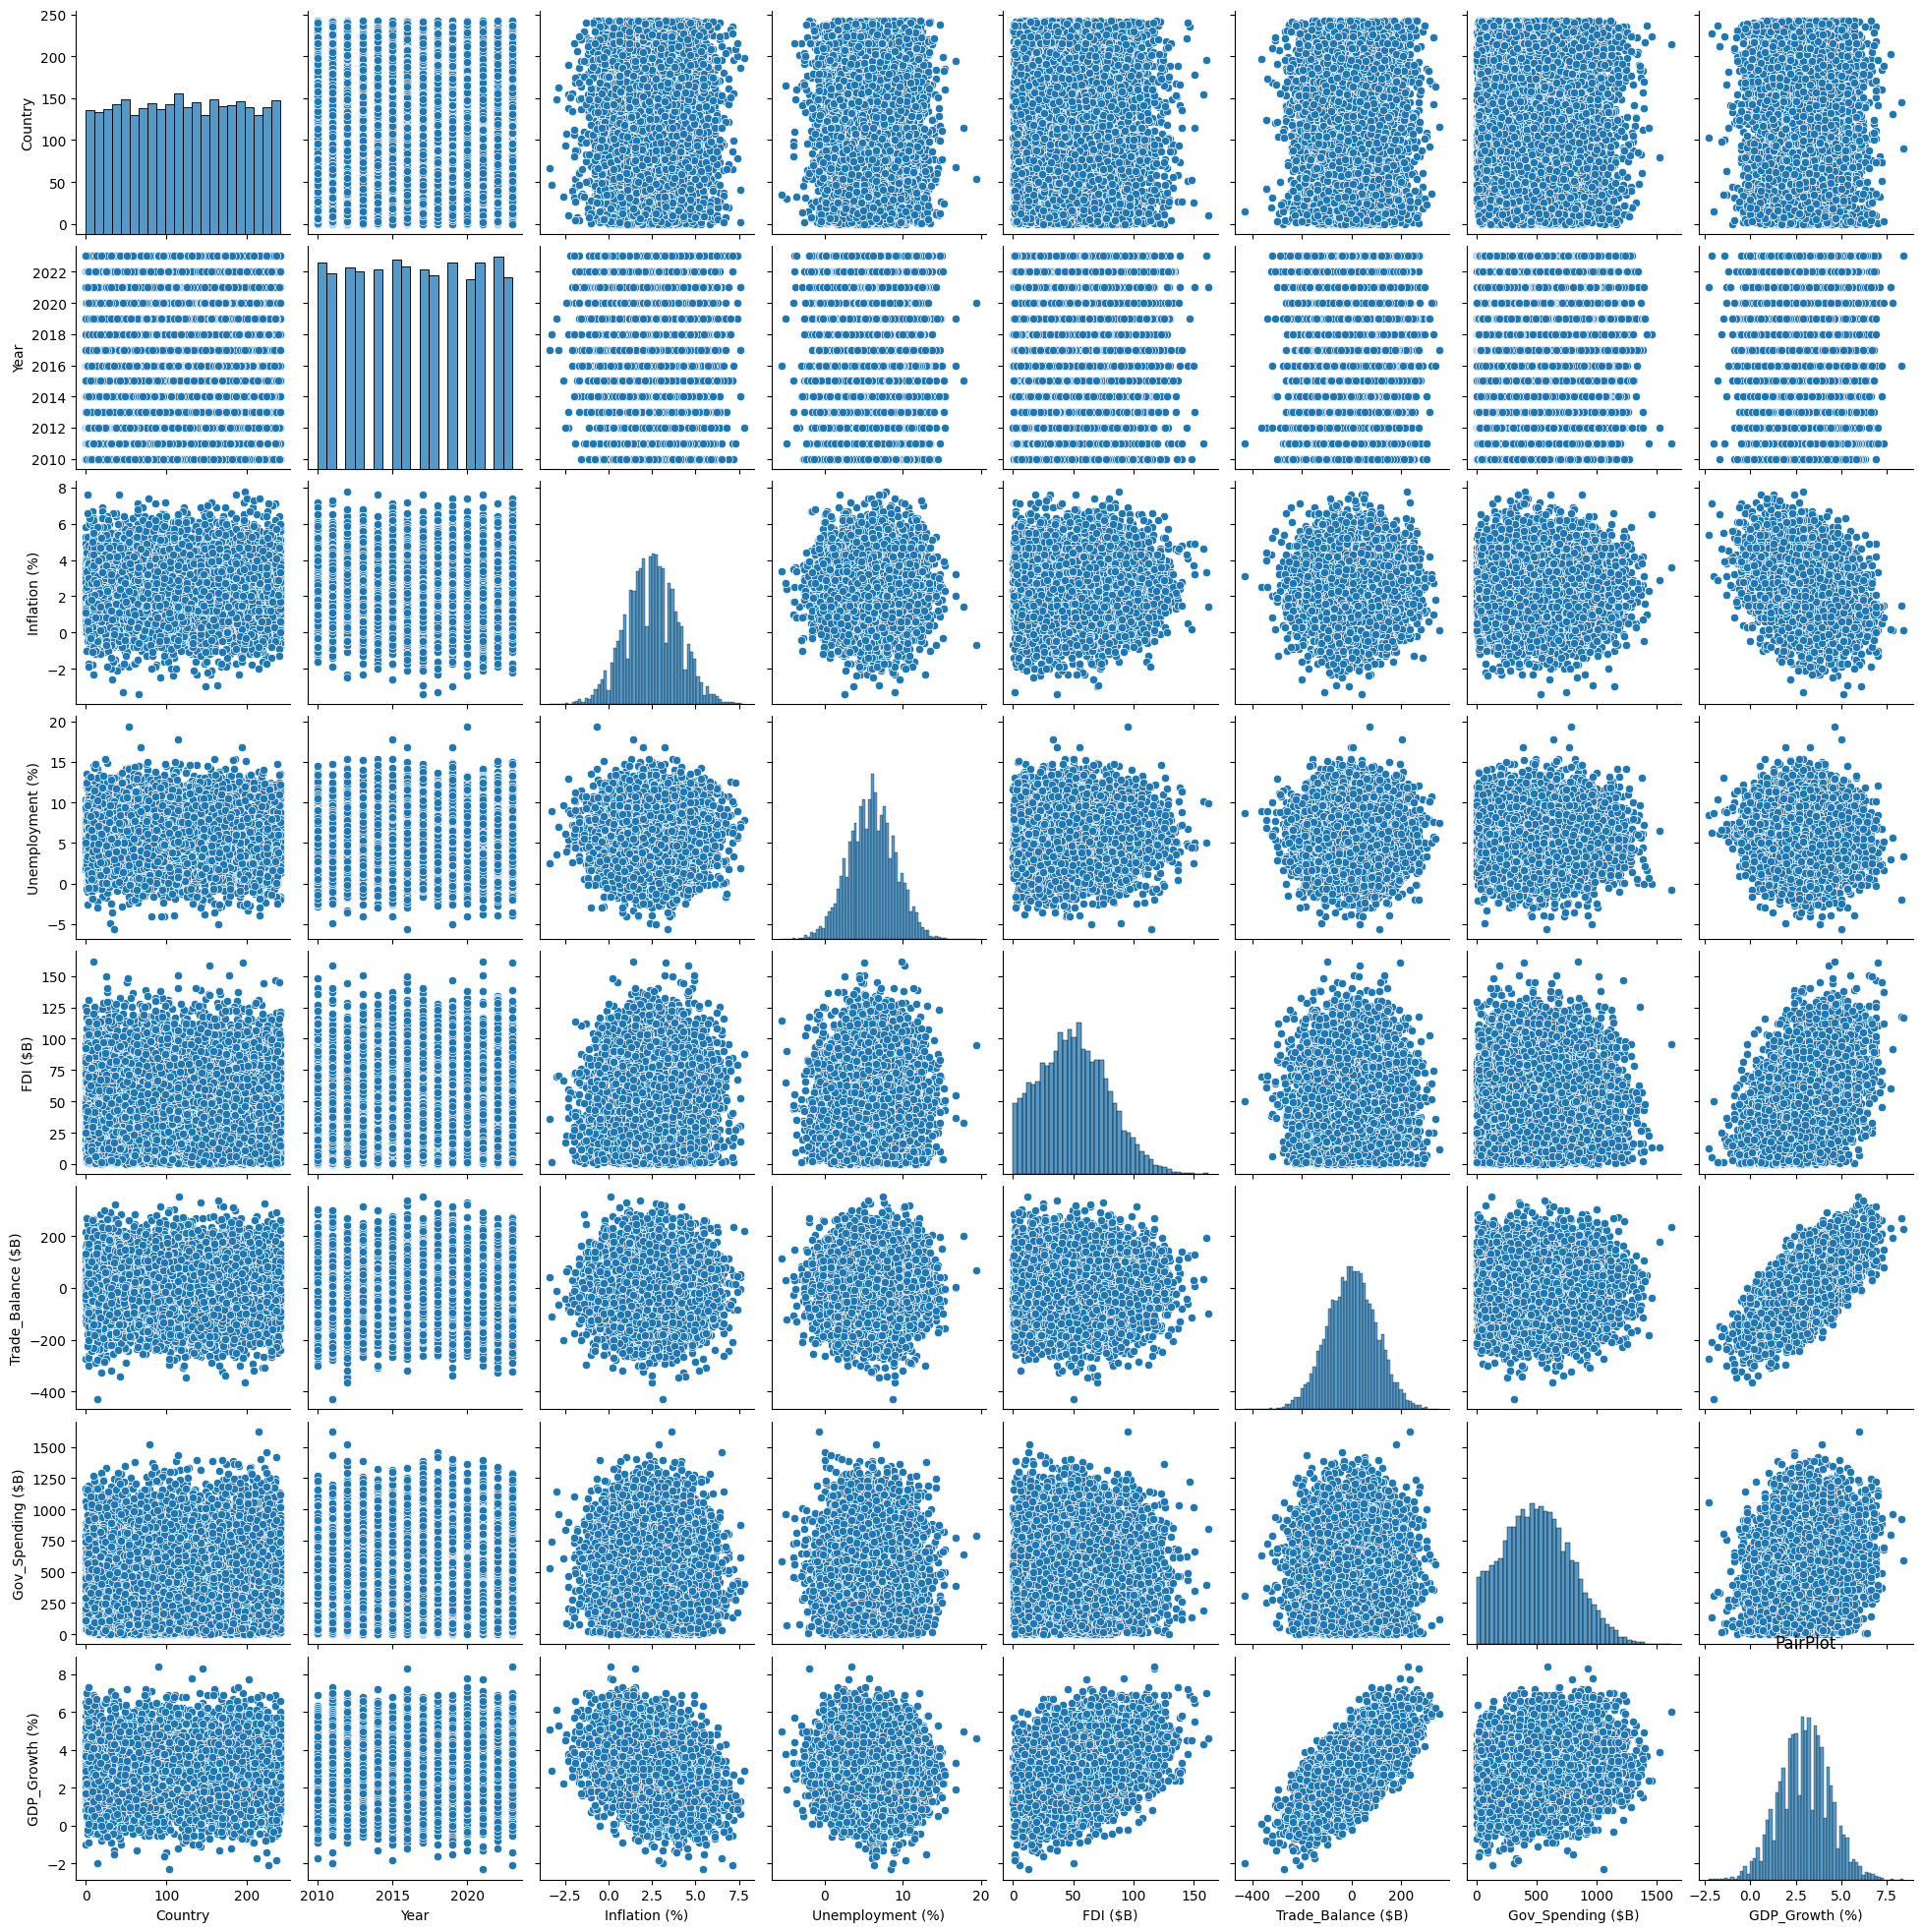

In [11]:
sns.pairplot(data=df)
plt.title("PairPlot")
plt.show()

### Check the Co-Relationship between the columns through Heatmap

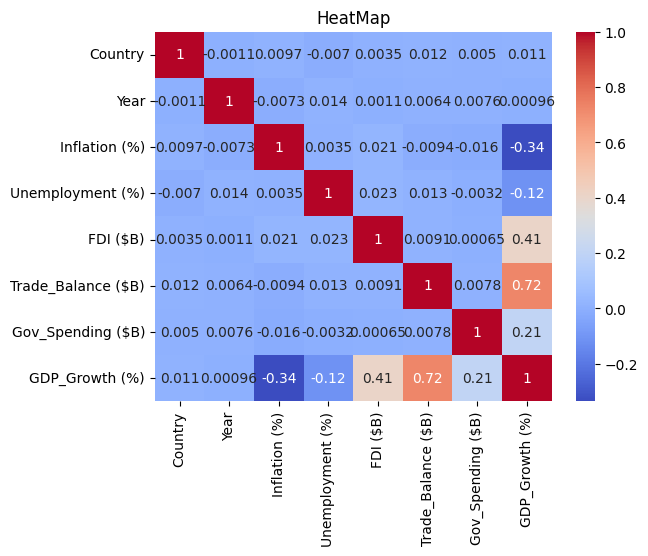

In [12]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("HeatMap")
plt.show()

### Split the data into x and y (Dependent or Independent Variable)

In [14]:
x=df.iloc[:,:-1]
y=df[["GDP_Growth (%)"]]

### Import train test split from sklearn for spliting data into testing and training 

In [15]:
from sklearn.model_selection import train_test_split

### Split the data into testing and training 

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20) #14 #12

### Import SVR Machine Learning model from Sklearn (Module SVM)

In [26]:
from sklearn.svm import SVR

### Apply the Model With special Parameters 

In [27]:
svr = SVR(kernel='poly', C=300, epsilon=0.5)
svr.fit(x_train,y_train)

C:\Users\zabiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,300
,epsilon,0.5
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


### Check the score (accurray) of the model for check the scanerio of the overfitting 

In your case:

Training: 86.20%

Testing: 85.28%

Gap: ~0.92%

That’s small, so I wouldn’t call this overfitting.
It’s actually quite a healthy model — your train and test performance are aligned.

In [28]:
svr.score(x_test,y_test)*100,svr.score(x_train,y_train)*100

(86.20366312676401, 85.28197239727365)

### Predict the value 

In [29]:
df["Prediction"] = svr.predict(x)
df.head()

,Country,Year,Inflation (%),Unemployment (%),FDI ($B),Trade_Balance ($B),Gov_Spending ($B),GDP_Growth (%),Prediction
0,117,2016,1.1,9.5,51.7,-141.7,1122.9,2.3,2.336483
1,48,2013,0.5,6.1,55.0,-126.6,536.7,2.7,2.333078
2,240,2022,0.1,8.4,68.8,39.5,716.0,4.5,4.466249
3,30,2020,3.1,8.2,27.3,-127.5,651.4,1.2,1.024629
4,29,2017,2.2,7.6,127.6,-13.5,226.6,4.2,4.085876


### Import Metrics from sklearn to check overall performace of the model 

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Check the Performance 

Let’s break them down:

MAE = 0.41 → On average, predictions are off by 0.41 units.

MSE = 0.27 → Squared error average, small value means good fit.

RMSE = 0.52 → Typical error is about 0.52 units (same units as your target).

R² = 86.20% → Model explains 86% of variance in the target.

If these are training results and your test set R² is 85.28%, then:

The gap is only 0.92%, which means no significant overfitting.

Your model is actually generalizing well — performance is very similar on unseen data.

In [30]:
y_pred = svr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2 * 100:.2f}")


📉 MAE: 0.41
📉 MSE: 0.27
📉 RMSE: 0.52
🎯 R² Score: 86.20


### Check the Model Performance Through the Visualization 

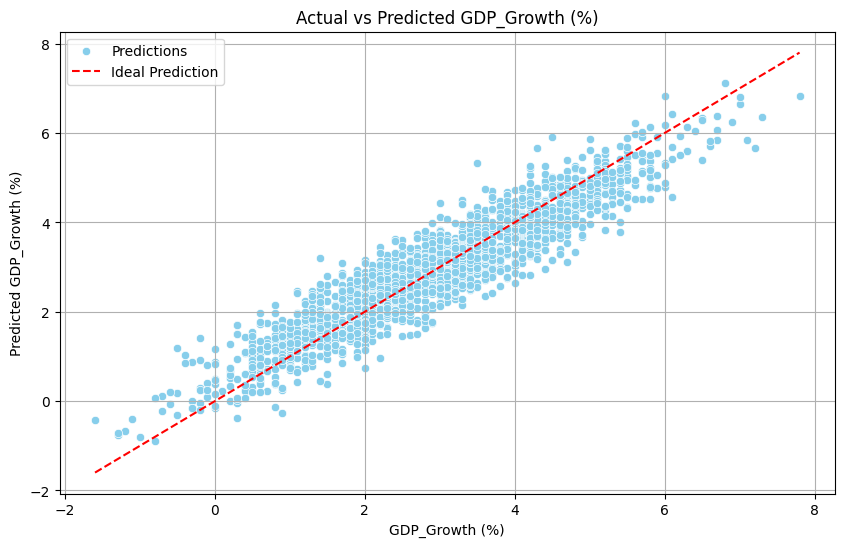

In [31]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='skyblue', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("GDP_Growth (%)")
plt.ylabel("Predicted GDP_Growth (%)")
plt.title("Actual vs Predicted GDP_Growth (%)")
plt.legend()
plt.grid(True)
plt.show()


## 📌 Conclusion

In this project, we implemented a **Support Vector Regression (SVR)** model to predict GDP growth based on multiple economic indicators.  
The workflow included:
- Data loading and exploratory data analysis (EDA)
- Feature scaling using StandardScaler
- Splitting data into training and testing sets
- Training the SVR model
- Model evaluation using MAE, MSE, RMSE, and R² Score

**Model Performance:**
- MAE: 0.41  
- MSE: 0.27  
- RMSE: 0.52  
- R² Score: 86.20% (train) and 85.28% (test)

These results show that the SVR model generalizes well, with minimal overfitting and strong predictive power.  
The project adheres to industry best practices and can be extended with hyperparameter tuning or alternative kernels for potentially improved performance.
